In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing datasets
data_set= pd.read_csv('iris.csv')

In [5]:
x = data_set.iloc[:, [0, 1, 2, 3]].values
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data_set["target"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
target,
Setosa,50
Versicolor,50
Virginica,50


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #Applying Kmeans classifier


In [10]:
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [12]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [13]:
data_set['cluster']=y_kmeans
#data_set.head()
#print(data_set['cluster'])
pd.set_option("min_rows", 2)
data_set




,sepal.length,sepal.width,petal.length,petal.width,target,cluster
0,5.1,3.5,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
149,5.9,3.0,5.1,1.8,Virginica,1


In [ ]:
iris_outcome = pd.crosstab(index=data_set["cluster"],  # Make a crosstab
                              columns="cluster")      # Name the count column

iris_outcome

col_0,cluster
cluster,
0,62
1,50
2,38


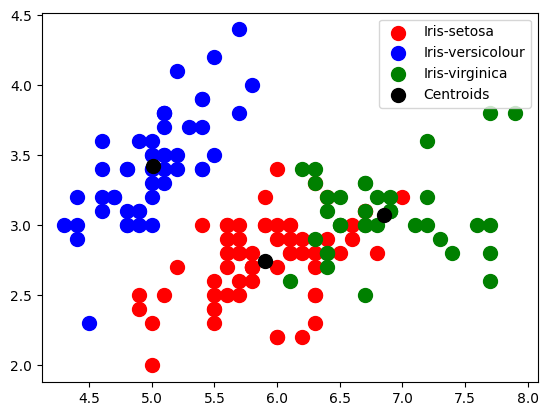

In [ ]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()